![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

In [7]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


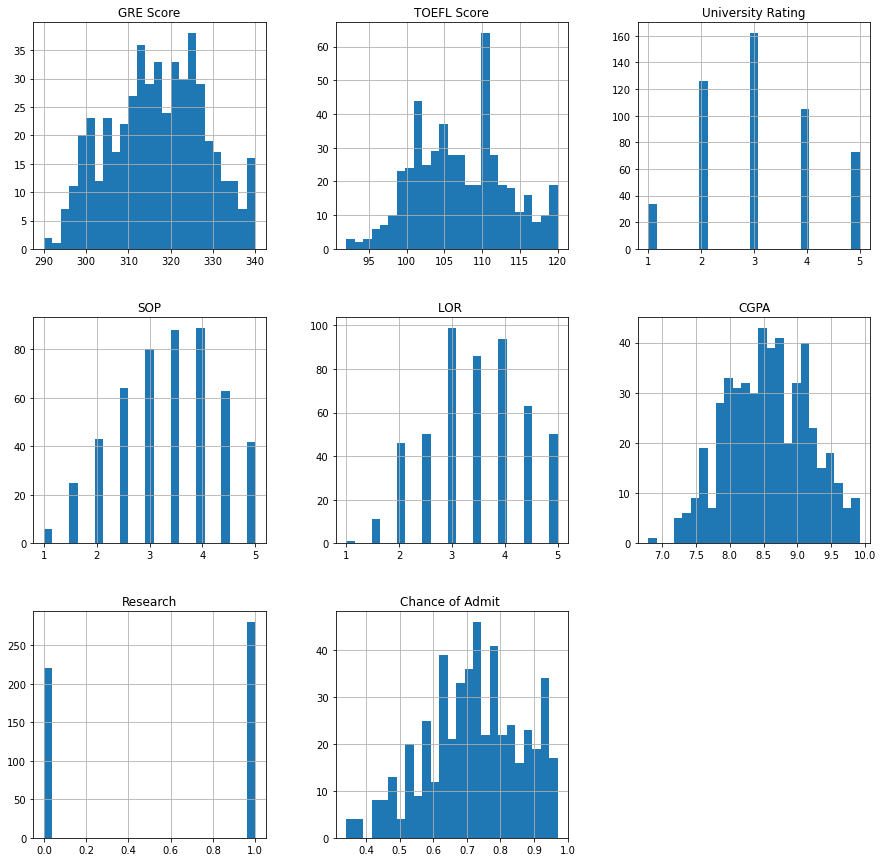

In [8]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [102]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
#Y = data[data.columns[-1]]
Y = data[['Chance of Admit ']]

In [103]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [104]:
# Normalización de variables predictoras (X) con la función StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')


# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

1  output variables
7 input variables


In [105]:
#Creación de la red de una sola capa
K.clear_session()
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))  # Capa de salida
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


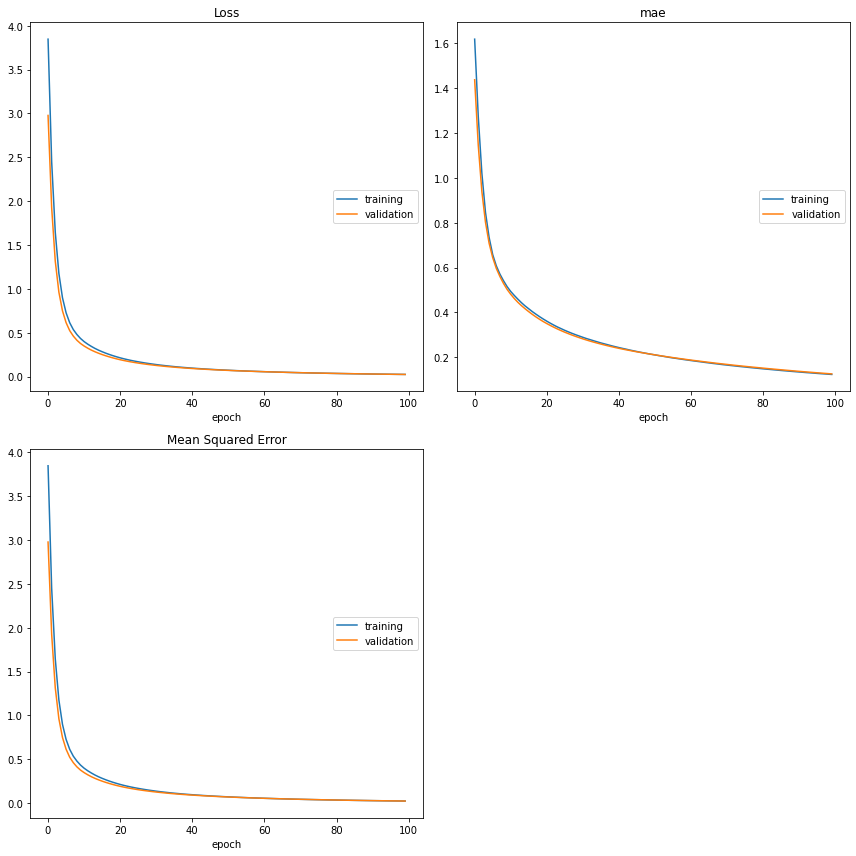

Loss
	training         	 (min:    0.025, max:    3.847, cur:    0.025)
	validation       	 (min:    0.025, max:    2.977, cur:    0.025)
mae
	training         	 (min:    0.123, max:    1.619, cur:    0.123)
	validation       	 (min:    0.126, max:    1.438, cur:    0.126)
Mean Squared Error
	training         	 (min:    0.025, max:    3.847, cur:    0.025)
	validation       	 (min:    0.025, max:    2.977, cur:    0.025)
5/5 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1257 - mse: 0.0249

MAE: 12.57%

MSE: 2.49%


In [106]:
# Compilar el modelo, generación de prediccione y evaluacion 

model.compile(loss=MeanSquaredError(), optimizer='sgd', metrics=['mae', 'mse'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=128, callbacks=[PlotLossesKeras(), early_stop])

# Evaluar el modelo
scores = model.evaluate(X_test, Y_test)
print("\nMAE: %.2f%%" % (scores[1]*100))
print("\nMSE: %.2f%%" % (scores[2]*100))
mae_1= scores[1]*100
mse_1= scores[2]*100

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [107]:
# Celda 2

#Creación de la red de dos capas
K.clear_session()
model = Sequential()
model.add(Dense(256, input_shape=(dims,), activation='relu'))  # Capa oculta
model.add(Dense(output_var, activation='relu'))  # Capa de salida
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


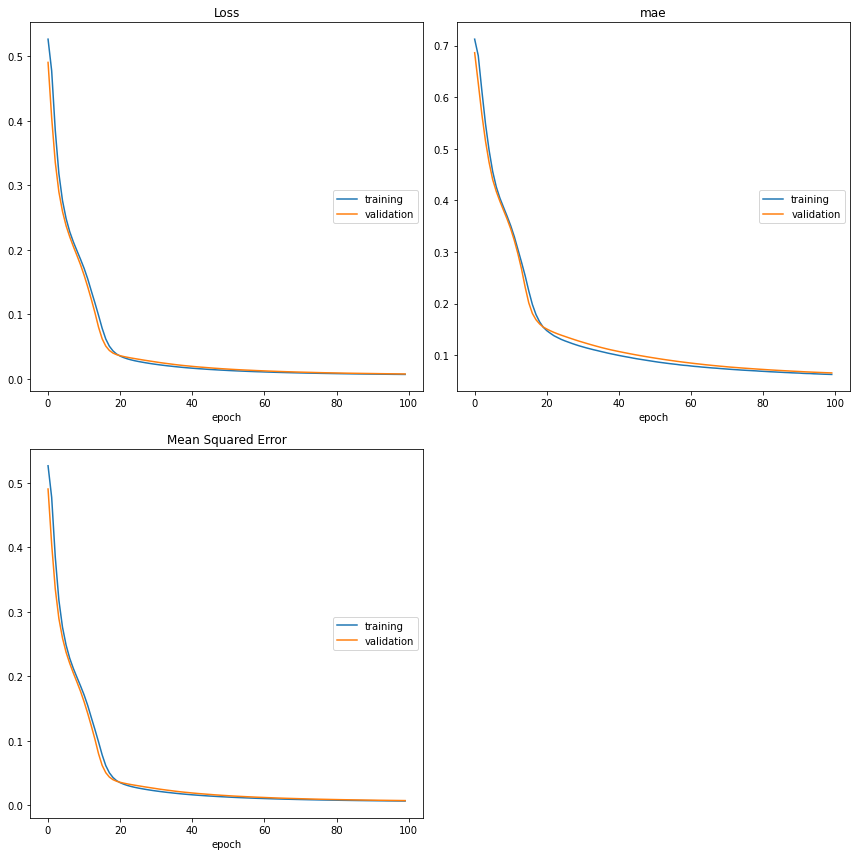

Loss
	training         	 (min:    0.007, max:    0.527, cur:    0.007)
	validation       	 (min:    0.007, max:    0.491, cur:    0.007)
mae
	training         	 (min:    0.063, max:    0.712, cur:    0.063)
	validation       	 (min:    0.066, max:    0.686, cur:    0.066)
Mean Squared Error
	training         	 (min:    0.007, max:    0.527, cur:    0.007)
	validation       	 (min:    0.007, max:    0.491, cur:    0.007)
5/5 [==============================] - 0s 5ms/step - loss: 0.0074 - mae: 0.0659 - mse: 0.0074

MAE: 6.59%

MSE: 0.74%


In [108]:
# Compilar el modelo
model.compile(loss=MeanSquaredError(), optimizer='sgd', metrics=['mae', 'mse'])

# Entrenar el modelo
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=128, callbacks=[early_stop, PlotLossesKeras()])

# Evaluar el modelo
scores = model.evaluate(X_test, Y_test)
print("\nMAE: %.2f%%" % (scores[1]*100))
print("\nMSE: %.2f%%" % (scores[2]*100))
mae_2= scores[1]*100
mse_2= scores[2]*100

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [112]:
# Celda 3

K.clear_session()
model = Sequential()
model.add(Dense(256, input_dim=dims, activation='relu'))  # Capa oculta 1
model.add(Dropout(0.5))  # Capa Dropout
model.add(Dense(256, activation='relu'))  # Capa oculta 2
model.add(Dropout(0.5))  # Capa Dropout
model.add(Dense(output_var, activation='relu'))  # Capa de salida
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


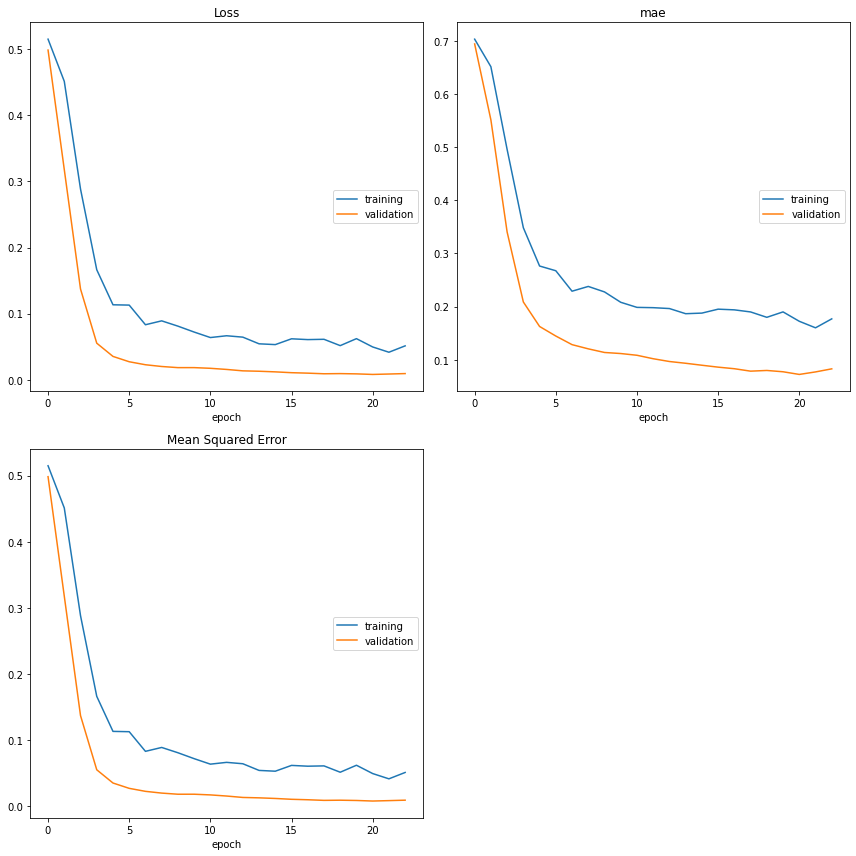

Loss
	training         	 (min:    0.042, max:    0.515, cur:    0.051)
	validation       	 (min:    0.008, max:    0.498, cur:    0.009)
mae
	training         	 (min:    0.160, max:    0.703, cur:    0.177)
	validation       	 (min:    0.072, max:    0.694, cur:    0.083)
Mean Squared Error
	training         	 (min:    0.042, max:    0.515, cur:    0.051)
	validation       	 (min:    0.008, max:    0.498, cur:    0.009)
11/11 [==============================] - 0s 39ms/step - loss: 0.0514 - mae: 0.1770 - mse: 0.0514 - val_loss: 0.0095 - val_mae: 0.0829 - val_mse: 0.0095
Epoch 23: early stopping
5/5 [==============================] - 0s 4ms/step - loss: 0.0095 - mae: 0.0829 - mse: 0.0095

MAE: 8.29%

MSE: 0.95%


In [113]:
# Compilar el modelo, generación de prediccione y evaluacion 

model.compile(loss=MeanSquaredError(), optimizer='sgd', metrics=['mae','mse'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=128, callbacks=[early_stop, PlotLossesKeras()])
scores = model.evaluate(X_test, Y_test)
print("\nMAE: %.2f%%" % (scores[1]*100))
print("\nMSE: %.2f%%" % (scores[2]*100))
mae_3= scores[1]*100
mse_3= scores[2]*100

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

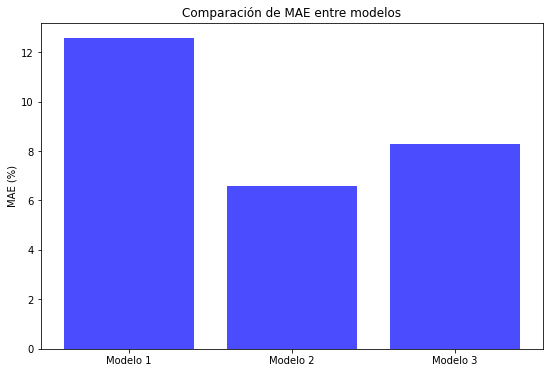

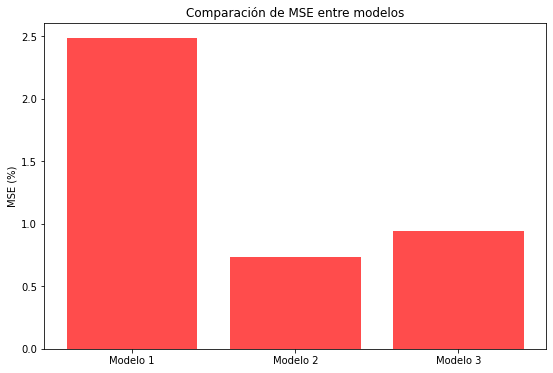

In [115]:
# Celda 4

# Datos
model_names = ['Modelo 1', 'Modelo 2', 'Modelo 3']
mae_values = [mae_1, mae_2, mae_3]  
mse_values = [mse_1, mse_2, mse_3]  

# Gráfico de barras para MAE
plt.figure(figsize=(9, 6))
plt.bar(model_names, mae_values, color='b', alpha=0.7)
plt.title('Comparación de MAE entre modelos')
plt.ylabel('MAE (%)')
plt.show()

# Gráfico de barras para MSE
plt.figure(figsize=(9, 6))
plt.bar(model_names, mse_values, color='r', alpha=0.7)
plt.title('Comparación de MSE entre modelos')
plt.ylabel('MSE (%)')
plt.show()

## Análisis de resultados

Previo al inicio del trabajo con los modelso, se realizo la estandarización de las variables para los conjuntos de training y test, adicional, se definico un Earling Stoping con el objetivo de evitar sobreajuste en el entrenamiento de los tres modelos, como hiperparámetros de sefinieron 100 epocas y un batch_size de 128.


**Modelo 1 (una capa):**

* Ventajas: Este es un modelo sencillo y rápido de entrenar.
* Desventajas: La simplicidad del modelo, la convierte en una desventaja, ya que es posible que no tenga loa suficiente capacidad para modelar relaciones más complejas en los datos. Su rendimiento es peor de los tres modelos, con un MAE del 12.57% y un MSE del 2.49%.

**Modelo 2 (dos capas):**

* Ventajas: Al tener una capa adicional el modelo tiene mas capacidad que el modelo 1. Tiene un buen rendimiento, con un MAE del 6.59% y un MSE del 0.74%, que para el caso es el mejor de los tres modelos evaluados.
* Desventajas: Al tener una capa adicional incrementa la complejidad lo que también significa que requiere más recursos para entrenar.

**Modelo 3 (varias capas con dropout):**

* Ventajas: Este modelo tiene mayor capacidad de los tres evaluados debido a que utiliza la técnica de regularización dropout. Aunque su rendimiento no es tan bueno como el del modelo 2.
* Desventajas: Este es el modelo más complejo de los tres, con 68,097 parámetros entrenables. Esto significa que necesita más recursos para entrenar que los tres modelos evaluados.